<a href="https://colab.research.google.com/github/rmonzon98/Mini-Proyecto-6/blob/main/Micro6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
* Raúl Monzon 17014
* David Valenzuela 171001

# <center> Mini Proyecto 6 </center>
## <center> Algoritmos genéticos </center>

### Dependencias a utilizar

In [8]:
import numpy as np 
import random
from itertools import combinations # Independencia para realizar el cruce genético

### Elaboración de algoritmo genético
---
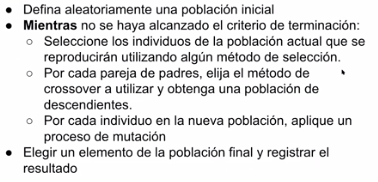

In [9]:
# Función definir una poblacion inicial
def poblacion_generador(ind, ls, condicion):
    poblacion = []
    while ind>0:
        x1, x2 = np.random.randint(0, high = ls), np.random.randint(0, high = ls)
        if condicion(x1,x2):
            poblacion.append(np.array([x1,x2]))
            ind = ind - 1
    return poblacion

#Tomar el valor más grande de un array
def max_val(arreglo):
  arreglo.sort()
  return arreglo[len(arreglo)-1]

# Evaluar población
def eval(poblacion,fitness_func):
  resultado = []
  for i in poblacion:
    resultado.append(fitness_func(i[0],i[1]))
  return resultado

def algoritmoMaestro(poblacion,funcion,condicion, cri_fin, ls, iteraciones):

  while iteraciones > 0:

    #Se evalua a toda la poblacion
    punteoGenotipos = eval(poblacion,funcion)

    #Se verifica si existe un individuo que tenga un valor mayor o igual al 
    #criterio final
    if max_val(punteoGenotipos) > cri_fin:
      cri_fin = max_val(punteoGenotipos)
    elif max_val(punteoGenotipos) == cri_fin:
      iteraciones = iteraciones - 1

    #Se escogen a los más aptos (a los individuos con valores más altos)}
    copia = punteoGenotipos
    copia.sort()
    index1 = punteoGenotipos.index(copia[len(copia)-1])
    index2 = punteoGenotipos.index(copia[len(copia)-2])
    padres= np.concatenate((poblacion[index1],poblacion[index2]))

    #Se realiza el cross-over
    hijo = combinations(padres,2)

    #Se obtiene una población de descendientes
    madre = poblacion[index1]
    padre = poblacion[index2]

    #Primero se agregan a los padres
    poblacion = []
    #Primero las damas
    poblacion.append(madre)
    poblacion.append(padre)
    #Se realiza una nueva mutación
    for i in hijo:
      cross_hijo = np.array(i)
      #Primero se ve si realmente ocurrira una mutación (si se da un valor mayor a 0.9)
      if (random.random() > 0.9):
        #Luego se ve que posicion se cambiara
        if (random.random()>=0.5):
          cross_hijo[0] = np.random.randint(0, high = ls)
        else:
          cross_hijo[1] = np.random.randint(0, high = ls)
      #Por ultimo se ve si cumple con la condicion
      if condicion(cross_hijo[0],cross_hijo[1]):
        poblacion.append(cross_hijo)

  return poblacion, cri_fin

### Task 1

---

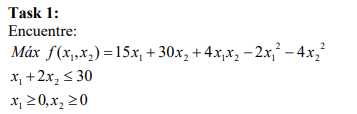

In [10]:
def fitness1(x1,x2):
  return 15*x1 + 30*x2 + 4*x1*x2 - 2*x1*x1 - 4*x2*x2

def condicion1(x1, x2):
    if ((x1 + 2*x2 <= 30) and (x1>=0) and (x2 >= 0)):
        return True
    else:
        return False

In [11]:
# Se denine la cantidad de individuos iniciales y la cantidad de iteraciones
individuos = 1000
iteraciones = 1000
#El limite inferior y superior el valor minimo y maximo que pueden tener los pares
ls = 50

#Se establece la poblacion inicial
poblacion = poblacion_generador(individuos,ls,condicion1)
#Se calcula el criterio final
criterio = eval(poblacion, fitness1)
criterio = max_val(criterio) 
#Se ejecuta el algoritmo genetico
poblacion, cri_fin = algoritmoMaestro(poblacion, fitness1, condicion1, criterio, ls, iteraciones)
poblacion = poblacion[0]
print('Con los valores x1= ',poblacion[0],' y x2= ',poblacion[1],'\nSe obtiene el valor maximo de ', cri_fin)

Con los valores x1=  12  y x2=  9 
Se obtiene el valor maximo de  270


### Task 2

---

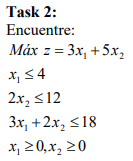


In [12]:
def fitness2(x1,x2):
  return 3*x1 + 5*x2

def condicion2(x1, x2):
    if ((3*x1 + 2*x2 <= 18) and (x1<=4) and (2*x2<=12) and (x1>=0) and (x2 >= 0)) :
        return True
    else:
        return False

In [13]:
# Se denine la cantidad de individuos iniciales y la cantidad de iteraciones
individuos = 1000
iteraciones = 1000
#El limite inferior y superior el valor minimo y maximo que pueden tener los pares
ls = 50

#Se establece la poblacion inicial
poblacion = poblacion_generador(individuos,ls,condicion2)
#Se calcula el criterio final
criterio = eval(poblacion, fitness2)
criterio = max_val(criterio) 
#Se ejecuta el algoritmo genetico
poblacion, cri_fin = algoritmoMaestro(poblacion, fitness2, condicion2, criterio, ls, iteraciones)
poblacion = poblacion[0]
print('Con los valores x1= ',poblacion[0],' y x2= ',poblacion[1],'\nSe obtiene el valor maximo de ', cri_fin)

Con los valores x1=  2  y x2=  2 
Se obtiene el valor maximo de  36


### Task 3

---

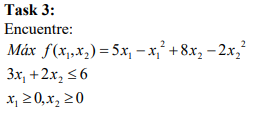

In [14]:
def fitness3(x1,x2):
  return 5*x1 - x2 + 8*x2 - 2*x2*x2

def condicion3(x1,x2):
  if ((3*x1 + 2*x2 <= 6) and (x1>=0) and (x2 >= 0)):
      return True
  else:
      return False

In [15]:
# Se denine la cantidad de individuos iniciales y la cantidad de iteraciones
individuos = 1000
iteraciones = 1000
#El limite inferior y superior el valor minimo y maximo que pueden tener los pares
ls = 50

#Se establece la poblacion inicial
poblacion = poblacion_generador(individuos,ls,condicion3)
#Se calcula el criterio final
criterio = eval(poblacion, fitness3)
criterio = max_val(criterio) 
#Se ejecuta el algoritmo genetico
poblacion, cri_fin = algoritmoMaestro(poblacion, fitness3, condicion3, criterio, ls, iteraciones)
poblacion = poblacion[0]
print('Con los valores x1= ',poblacion[0],' y x2= ',poblacion[1],'\nSe obtiene el valor maximo de ', cri_fin)

Con los valores x1=  1  y x2=  1 
Se obtiene el valor maximo de  10
